<a href="https://colab.research.google.com/github/zxn16/CN6005-2526-T1-Artifical-Intelligence-/blob/main/Lab2_Explainable_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mean Squared Error: 0.07
R² Score: 0.88


/tmp/ipython-input-3223071193.py:27: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test)


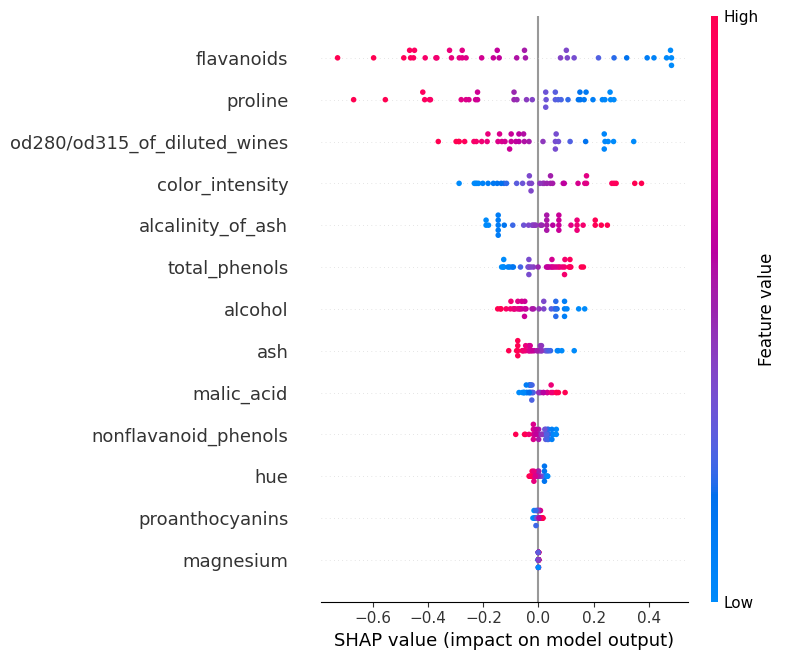

In [3]:
import shap
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
# Load the diabetes dataset
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target, name="target")
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")
# SHAP explanation
explainer = shap.Explainer(model.predict, X_train)
shap_values = explainer(X_test)
# SHAP summary plot
shap.summary_plot(shap_values, X_test)

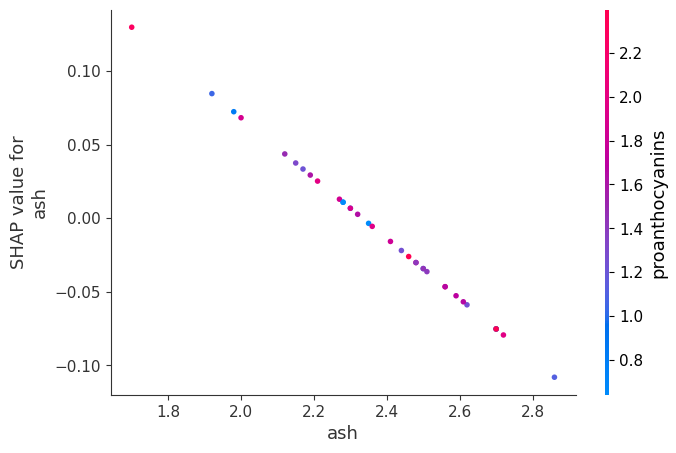

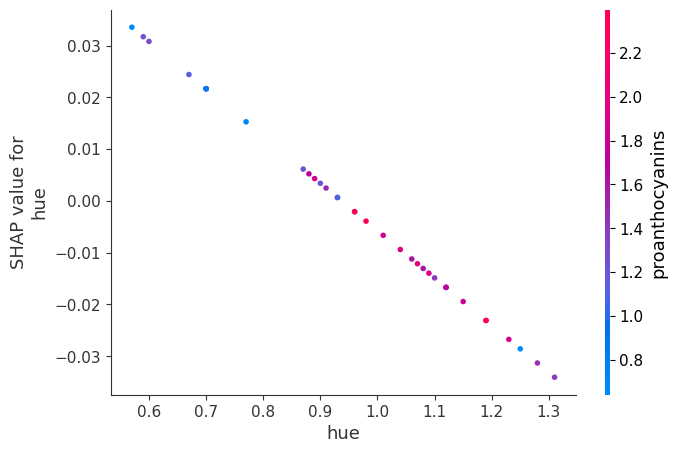

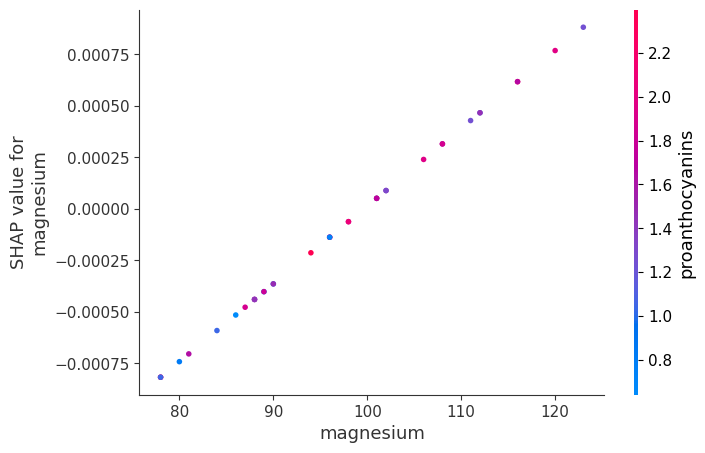

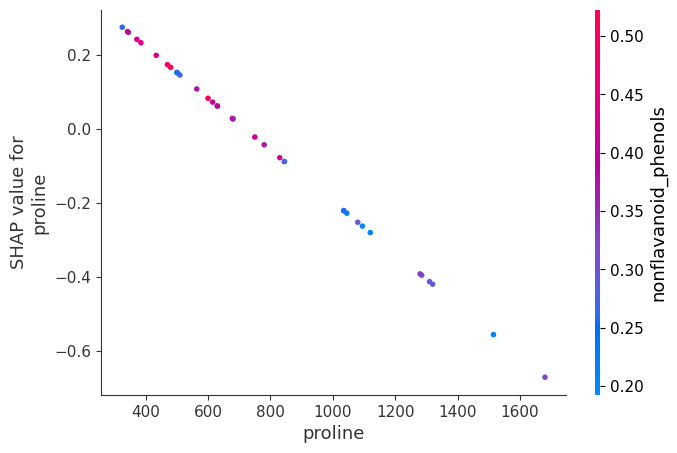

In [4]:

# Generate SHAP dependence plots
selected_features = ['ash', 'hue', 'magnesium', 'proline']
for feature in selected_features:
    shap.dependence_plot(feature, shap_values.values, X_test, feature_names=X_test.columns)
    plt.savefig(f"shap_dependence_{feature}.png")
    plt.close()


## Introduction

This notebook explores the relationship between various chemical properties of wine and its target variable using a linear regression model. We will then use SHAP (SHapley Additive exPlanations) to interpret the model's predictions and understand the contribution of each feature.

## Method

1. **Data Loading and Preparation**: The Wine dataset is loaded from scikit-learn. The data is split into training and testing sets.
2. **Model Training**: A linear regression model is trained on the training data.
3. **Model Evaluation**: The trained model is evaluated using Mean Squared Error (MSE) and R-squared (R²) on the testing data.
4. **SHAP Explanation**: SHAP values are calculated to explain the predictions of the linear regression model.
5. **SHAP Visualization**: SHAP summary and dependence plots are generated to visualize the feature importance and the effect of individual features on the model's output.

## Explanation of Results using SHAP

The SHAP summary plot provides an overview of the feature importance. Features are ranked by their average absolute SHAP value. The plot shows how each feature affects the model's output for each instance in the dataset.

The SHAP dependence plots show the relationship between a single feature and the SHAP value for that feature. This helps to understand how the feature's value influences the model's prediction and whether the relationship is linear or non-linear.